#Theoretical Questions

###1.What is a Decision Tree, and how does it work

A Decision Tree is a machine learning model used for classification and regression tasks. It is structured like a tree where:

Each internal node represents a decision based on a feature.

Each branch represents an outcome of the decision.

Each leaf node represents a class label (for classification) or a numerical value (for regression).

###How It Works:
The algorithm starts from the root node and recursively splits the dataset based on a feature that provides the best separation.

The splitting criterion is determined using impurity measures like Gini Impurity or Entropy.

The tree continues splitting until a stopping condition is met (e.g., maximum depth, minimum samples per node, or no improvement in purity).

The final leaf nodes provide the prediction.

###2.What are impurity measures in Decision Trees

Impurity measures help determine how “mixed” the classes are within a node. The goal is to find a split that minimizes impurity.

###Types of Impurity Measures:

1.Gini Impurity: Measures the probability of incorrect classification.

2.Entropy: Measures the disorder or uncertainty in a node.

3.Variance Reduction: Used in Decision Tree Regressors to measure homogeneity of numerical values.


###3. What is the mathematical formula for Gini Impurity

The Gini Impurity measures the probability that a randomly chosen element from a set is incorrectly classified.

𝐺
𝑖
𝑛
𝑖
=
1
−
∑
𝑖
=
1
𝑛
𝑝
𝑖
2

where:

p
i is the proportion of class
i in the node.

###4.What is the mathematical formula for Entropy	.

Entropy measures the disorder or unpredictability in a dataset.

𝐸
𝑛
𝑡
𝑟
𝑜
𝑝
𝑦
=
−
∑
𝑖
=
1
𝑛
𝑝
𝑖
log
⁡
2
𝑝
𝑖

where:


p
i is the probability of class
i.

###5.What is Information Gain, and how is it used in Decision Trees

Information Gain (IG) measures the reduction in entropy after splitting a node.

𝐼
𝐺
=
𝐸
𝑛
𝑡
𝑟
𝑜
𝑝
𝑦
(
𝑝
𝑎
𝑟
𝑒
𝑛
𝑡
)
−
∑
𝑖
𝑁
𝑖
𝑁
×
𝐸
𝑛
𝑡
𝑟
𝑜
𝑝
𝑦
(
𝑖
)

where:


N
i is the number of samples in a child node.

N is the total number of samples in the parent node.

A feature with higher Information Gain is selected for splitting.

###6.What is the difference between Gini Impurity and Entropy





```
     Metrics                  Gini Impurity	                   Entropy
Calculation Speed	     Faster (no logarithm)	        Slower (uses logarithms)
Splitting Preference	Tends to create pure splits	  Creates more balanced splits
Computational Complexity	     Lower	                           Higher
```
Gini Impurity and Entropy often produce similar results, but Gini is slightly faster.




###7.What is the mathematical explanation behind Decision Trees

A Decision Tree follows recursive partitioning, where:

Impurity Calculation: Gini or Entropy is calculated for the entire dataset.

Feature Selection: The feature that results in the highest Information Gain is chosen.

Recursive Splitting: The dataset is split, and the process repeats until a stopping condition is met.

Pruning: Overgrown trees are trimmed to prevent overfitting.

###8.What is Pre-Pruning in Decision Trees

Pre-pruning stops tree growth before it fully develops by setting constraints like:

Maximum tree depth (max_depth)

Minimum samples per split (min_samples_split)

Minimum samples per leaf (min_samples_leaf)

Purpose: Prevents overfitting by limiting tree complexity.

###9.What is Post-Pruning in Decision Trees

Post-pruning removes unnecessary branches after the tree is fully grown using techniques like:

Cost Complexity Pruning (CCP): Prunes branches that do not significantly improve accuracy.

Purpose: Reduces overfitting while preserving useful patterns.

###10.What is the difference between Pre-Pruning and Post-Pruning

```
**Pruning Type**    	     ** Pre-Pruning**	                   ** Post-Pruning**
When Applied	           During training	                   After training
How It Works	         Stops splits early	            Trims unnecessary branches
Purpose	Avoids         overfitting early	          Removes overfitting later
Risk	                   May underfit	                      Reduces overfitting
```

###11.What is a Decision Tree Regressor

A Decision Tree Regressor is used for predicting continuous values instead of class labels. It:

Uses Mean Squared Error (MSE) or Mean Absolute Error (MAE) as a criterion.

Splits the dataset to minimize variance in numerical values.


###12.What are the advantages and disadvantages of Decision Trees

Advantages:

✅ Easy to interpret and visualize.

✅ Handles both numerical and categorical data.

✅ Requires little preprocessing.

Disadvantages:

❌ Prone to overfitting.

❌ Sensitive to small variations in data.

❌ Can be biased toward dominant classes.

###13. How does a Decision Tree handle missing values

Uses imputation techniques (mean, median, mode).

Assigns missing values to the most frequent class.

Uses surrogate splits (alternative decision rules).

###14.How does a Decision Tree handle categorical features

Label Encoding: Assigns numerical values to categories.

One-Hot Encoding: Creates binary columns for each category.


###15.What are some real-world applications of Decision Trees?

1.Medical Diagnosis – Identifying diseases based on symptoms.

2.Fraud Detection – Detecting credit card fraud.

3.Loan Approval – Predicting whether a person qualifies for a loan.

4.Stock Market Prediction – Analyzing financial trends.


#Practical Questions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier

# Load datasets
iris = load_iris()
housing = fetch_california_housing()

# Split datasets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)

# 16.Write a Python program to train a Decision Tree Classifier on the Iris dataset and print the model accuracy
def decision_tree_classifier():
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred))

decision_tree_classifier()



Decision Tree Classifier Accuracy: 1.0


In [3]:
#17.Write a Python program to train a Decision Tree Classifier using Gini Impurity as the criterion and print the feature importances.
def decision_tree_gini():
    clf_gini = DecisionTreeClassifier(criterion="gini")
    clf_gini.fit(X_train, y_train)
    print("Feature Importances (Gini):", clf_gini.feature_importances_)

decision_tree_gini()



Feature Importances (Gini): [0.         0.01667014 0.90614339 0.07718647]


In [4]:
#18.Write a Python program to train a Decision Tree Classifier using Entropy as the splitting criterion and print the model accuracy

def decision_tree_entropy():
    clf_entropy = DecisionTreeClassifier(criterion="entropy")
    clf_entropy.fit(X_train, y_train)
    y_pred_entropy = clf_entropy.predict(X_test)
    print("Decision Tree with Entropy Accuracy:", accuracy_score(y_test, y_pred_entropy))

decision_tree_entropy()


Decision Tree with Entropy Accuracy: 1.0


In [6]:
#19.Write a Python program to train a Decision Tree Regressor on a housing dataset and evaluate using Mean Squared Error (MSE).

def decision_tree_regressor():
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train_h, y_train_h)
    y_pred_h = regressor.predict(X_test_h)
    print("Decision Tree Regressor MSE:", mean_squared_error(y_test_h, y_pred_h))

decision_tree_regressor()


Decision Tree Regressor MSE: 0.4933423440106831


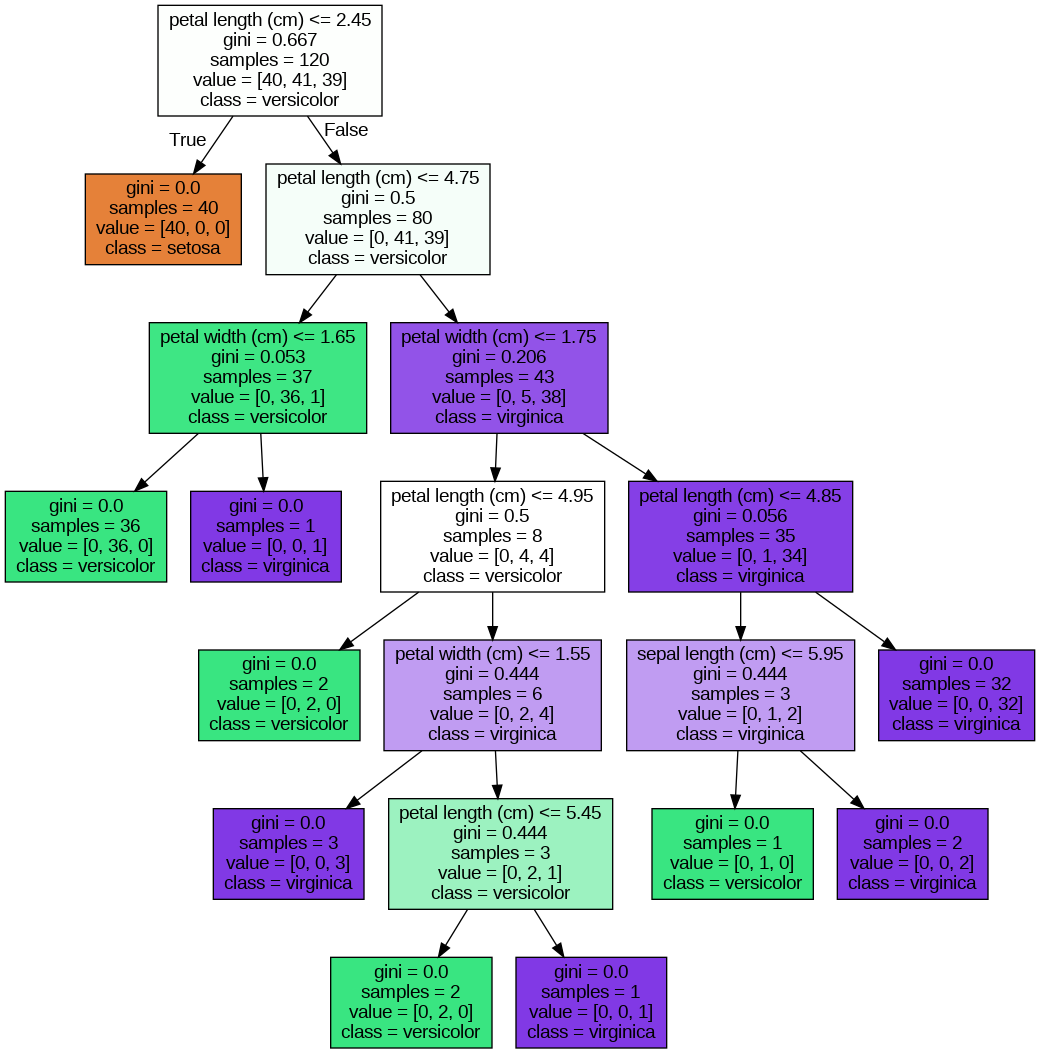

In [9]:
#20.Write a Python program to train a Decision Tree Classifier and visualize the tree using graphviz

import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

def visualize_tree():
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    dot_data = export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
    graph = graphviz.Source(dot_data)

    # Save as PNG and display
    graph.render("tree", format="png", cleanup=True)
    from IPython.display import Image
    return Image(filename="tree.png")

visualize_tree()



In [10]:
#21.Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree.

def decision_tree_pruned():
    clf_pruned = DecisionTreeClassifier(max_depth=3)
    clf_pruned.fit(X_train, y_train)
    print("Pruned Tree Accuracy:", accuracy_score(y_test, clf_pruned.predict(X_test)))

decision_tree_pruned()


Pruned Tree Accuracy: 1.0


In [11]:
#22.Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree.

def decision_tree_min_samples():
    clf_split = DecisionTreeClassifier(min_samples_split=5)
    clf_split.fit(X_train, y_train)
    print("Min Samples Split=5 Accuracy:", accuracy_score(y_test, clf_split.predict(X_test)))

decision_tree_min_samples()


Min Samples Split=5 Accuracy: 1.0


In [12]:
#23.Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data

def decision_tree_scaled():
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    clf_scaled = DecisionTreeClassifier()
    clf_scaled.fit(X_train_scaled, y_train)
    print("Feature Scaling Accuracy:", accuracy_score(y_test, clf_scaled.predict(X_test_scaled)))

decision_tree_scaled()


Feature Scaling Accuracy: 1.0


In [13]:
#24.Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification

def decision_tree_ovr():
    ovr_clf = OneVsRestClassifier(DecisionTreeClassifier())
    ovr_clf.fit(X_train, y_train)
    print("OvR Accuracy:", accuracy_score(y_test, ovr_clf.predict(X_test)))

decision_tree_ovr()


OvR Accuracy: 1.0


In [14]:
#25.Write a Python program to train a Decision Tree Classifier and display the feature importance scores

def feature_importance():
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    print("Feature Importance Scores:", clf.feature_importances_)

feature_importance()


Feature Importance Scores: [0.03334028 0.         0.38926487 0.57739485]


In [15]:
#26.Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree

def decision_tree_regressor_depth():
    regressor_depth = DecisionTreeRegressor(max_depth=5)
    regressor_depth.fit(X_train_h, y_train_h)
    y_pred_h_depth = regressor_depth.predict(X_test_h)
    print("Regressor Max Depth=5 MSE:", mean_squared_error(y_test_h, y_pred_h_depth))

decision_tree_regressor_depth()


Regressor Max Depth=5 MSE: 0.5245146178314735


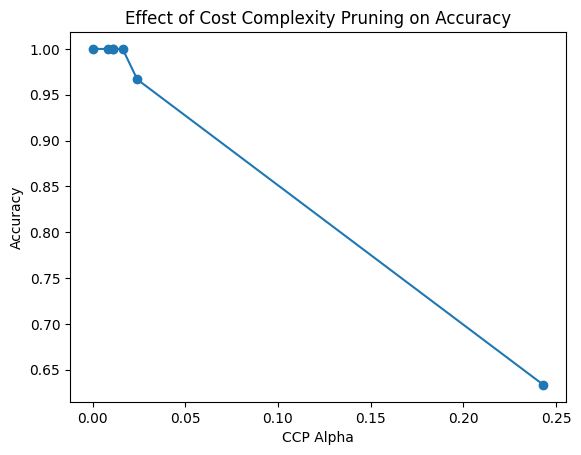

In [16]:
#27.Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy.

def cost_complexity_pruning():
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    ccp_path = clf.cost_complexity_pruning_path(X_train, y_train)
    alphas = ccp_path.ccp_alphas[:-1]
    pruned_trees = [DecisionTreeClassifier(ccp_alpha=alpha).fit(X_train, y_train) for alpha in alphas]
    pruned_accuracies = [accuracy_score(y_test, tree.predict(X_test)) for tree in pruned_trees]
    plt.plot(alphas, pruned_accuracies, marker='o')
    plt.xlabel('CCP Alpha')
    plt.ylabel('Accuracy')
    plt.title('Effect of Cost Complexity Pruning on Accuracy')
    plt.show()

cost_complexity_pruning()


In [17]:
#28. Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score

def evaluate_metrics():
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))

evaluate_metrics()


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



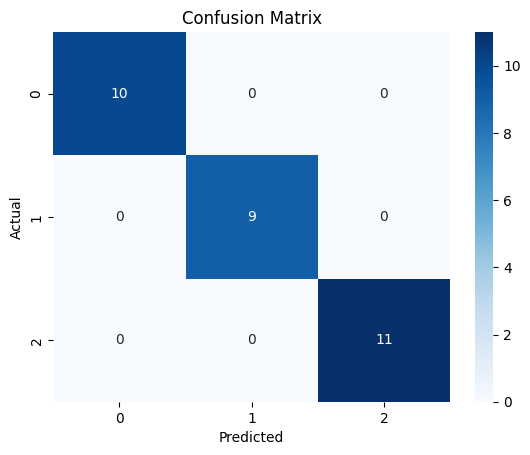

In [18]:
#29.Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn

def confusion_matrix_plot():
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

confusion_matrix_plot()


In [20]:
#30.* Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split.

def hyperparameter_tuning():
    param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
    grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    print("Best Parameters from GridSearchCV:", grid_search.best_params_)

hyperparameter_tuning()



Best Parameters from GridSearchCV: {'max_depth': 10, 'min_samples_split': 2}
